In [1]:
import pandas as pd
import librosa
import librosa.display
import statistics
from scipy.ndimage.measurements import variance
from numpy.core.fromnumeric import mean
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn

# Skip

In [2]:
import os
arr = os.listdir('genres/all')
print(arr)

FileNotFoundError: [Errno 2] No such file or directory: 'genres/all'

In [16]:
import librosa
audio_path = 'genres/all'+'/'+arr[0]
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


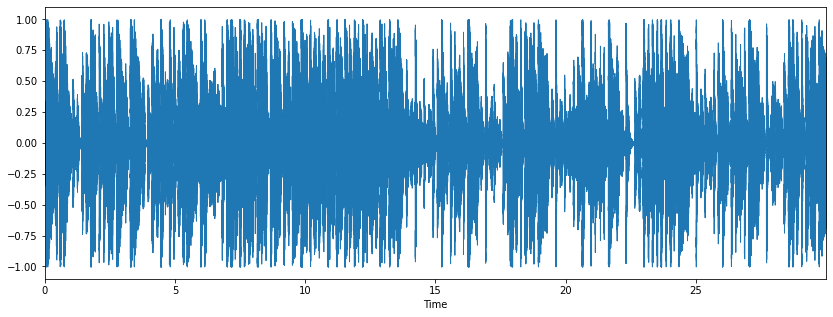

In [17]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

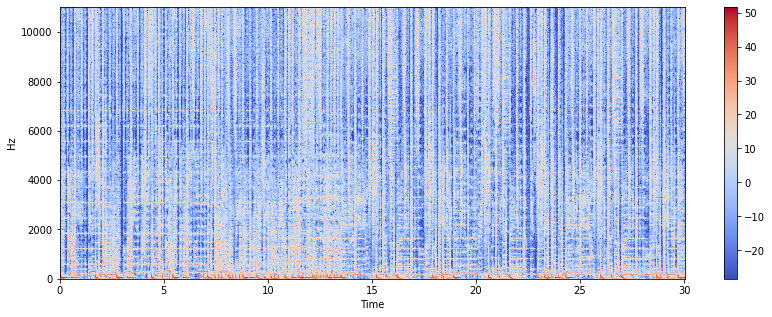

In [18]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

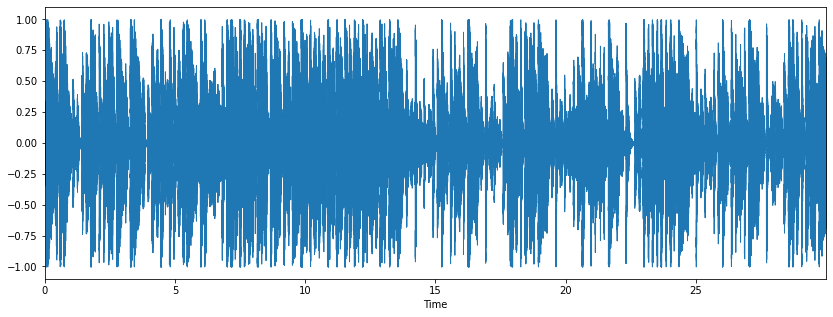

In [19]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

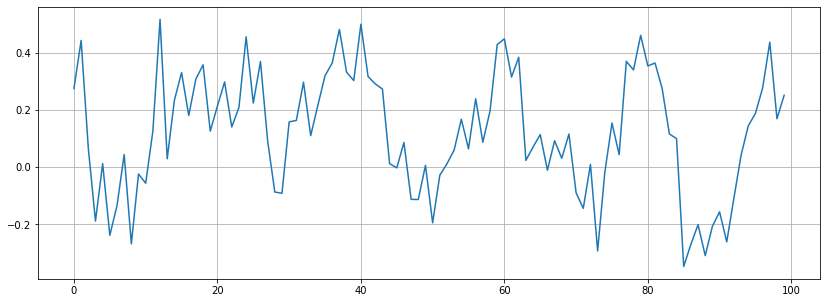

In [20]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [21]:
def song_name(file):
    lis=[]
    file2='genres/all/'+file
    y, sr = librosa.load(file2,)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    hop_length = 5000
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    rmse = librosa.feature.rms(y=y)
    y_harm, y_perc = librosa.effects.hpss(y=y)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y, pad=False)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    
    lis.append(np.mean(spectral_bandwidth))
    lis.append(np.var(spectral_bandwidth))
    lis.append(np.mean(spectral_centroids))
    lis.append(np.var(spectral_centroids))
    lis.append(tempo)
    lis.append(np.sum(beats))
    lis.append(np.mean(chroma_stft))
    lis.append(np.var(chroma_stft))
    lis.append(np.mean(rmse))
    lis.append(np.var(rmse))
    lis.append(np.mean(cent))
    lis.append(np.var(cent))
    lis.append(np.mean(spec_bw))
    lis.append(np.var(spec_bw))
    lis.append(np.mean(rolloff))
    lis.append(np.var(rolloff))
    lis.append(np.mean(zcr))
    lis.append(np.var(zcr))
    for coefficient in mfcc:
        lis.append(np.mean(coefficient))
        lis.append(np.var(coefficient))
    split_string = file.split(".", 1)
    substring = split_string[0]
    lis.append(np.mean(y_harm))
    lis.append(np.var(y_harm))
    lis.append(np.mean(y_perc))
    lis.append(np.var(y_perc))
    lis.append(substring)
    return lis

In [22]:
lis2=[]
j=0
for i in arr:
    file=i
    print(j)
    try:
        lis=song_name(file)
        lis2.append(lis)
    except:
        print(i)
    j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
df = pd.DataFrame(lis2, columns = ['spectral_bandwidth_mean', 'spectral_bandwidth_var','spectral_centroids_mean','spectral_centroids_var','tempo', 'beats','chroma_stft_mean','chroma_stft_var','rmse_mean','rmse_var','cent_mean','cent_var','spec_bw_mean','spec_bw_var','rolloff_mean','rolloff_var','zcr_mean','zcr_var','mfcc1_mean','mfcc1_var','mfcc2_mean','mfcc2_var','mfcc3_mean','mfcc3_var','mfcc4_mean','mfcc4_var','mfcc5_mean','mfcc5_var','mfcc6_mean','mfcc6_var','mfcc7_mean','mfcc7_var','mfcc8_mean','mfcc8_var','mfcc9_mean','mfcc9_var','mfcc10_mean','mfcc10_var','mfcc11_mean','mfcc11_var','mfcc12_mean','mfcc12_var','mfcc13_mean','mfcc13_var','mfcc14_mean','mfcc14_var','mfcc15_mean','mfcc15_var','mfcc16_mean','mfcc16_var','mfcc17_mean','mfcc17_var','mfcc18_mean','mfcc18_var','mfcc19_mean','mfcc19_var','mfcc20_mean','mfcc20_var','harm_mean','harm_var','percp_mean','percp_var','label'])

In [74]:
df

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,3222.448442,234208.858861,3682.386205,2.140228e+06,89.102909,27875,0.475536,0.099945,0.250078,0.015148,...,71.471207,0.481101,63.351250,-1.791958,93.538330,-1.567315e-06,0.045228,0.000050,0.019454,pop
1,1525.450514,67246.503527,1396.592429,8.712185e+04,117.453835,36090,0.252217,0.090984,0.019732,0.000168,...,177.337219,14.694926,231.495651,11.523016,254.668823,-1.154608e-05,0.000474,-0.000006,0.000020,classical
2,3361.748634,98164.245112,3941.262858,1.351502e+06,103.359375,32084,0.415795,0.090757,0.240792,0.017005,...,62.631397,-5.403533,69.497147,-4.323020,74.966042,-7.774666e-06,0.028181,0.000116,0.031145,pop
3,1754.216082,283554.933422,1503.869486,5.545765e+05,123.046875,39809,0.339819,0.084151,0.046747,0.001542,...,55.707256,-1.991485,50.006485,-3.353826,49.906399,-4.445727e-04,0.001813,-0.000502,0.000754,jazz
4,1913.258610,123441.419116,1886.954809,2.533910e+05,92.285156,26051,0.431658,0.083609,0.175975,0.003569,...,46.263088,-2.127222,47.571033,-1.508367,50.199821,-3.660583e-06,0.014277,-0.000064,0.010393,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2262.593429,93229.077895,2678.321539,4.676829e+05,117.453835,34662,0.500618,0.082188,0.175927,0.005659,...,181.693237,14.656418,202.773300,15.369627,225.773956,6.875749e-05,0.026343,0.000386,0.006491,hiphop
996,1806.873242,126050.582307,1591.292872,3.319340e+05,143.554688,45547,0.340995,0.090884,0.108627,0.002738,...,80.644913,-3.570771,66.350273,-6.707165,68.708389,8.130270e-07,0.009379,-0.000022,0.002496,country
997,2116.458982,42525.919040,2284.243390,2.412197e+05,95.703125,30532,0.428281,0.085193,0.171670,0.005870,...,90.557999,-1.992990,87.970009,-0.736064,77.979248,-8.921643e-06,0.009859,-0.000673,0.013957,hiphop
998,1970.145374,98732.471264,1934.746539,2.500673e+05,112.347147,34936,0.360992,0.087425,0.144382,0.002804,...,45.047028,-1.457679,36.198315,-5.915813,43.543652,3.641537e-06,0.013379,0.000003,0.004392,country


In [76]:
df.to_csv('df.csv',)

# Start From Here

In [2]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('df.csv',index_col=0)
data

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,2644.362516,166313.529886,2539.121009,876112.502768,99.384014,31237,0.476625,0.090673,0.195715,0.010600,...,42.825832,-0.939100,66.891655,-1.083433,76.864410,-1.547620e-04,0.027665,-1.066345e-03,0.008855,reggae
1,1738.858902,58868.399307,1465.857446,143302.098295,73.828125,22129,0.254607,0.087663,0.060560,0.001276,...,160.025467,1.109709,136.810150,2.935806,95.914482,4.176099e-05,0.004387,1.114175e-04,0.000151,jazz
2,2162.799226,67058.366744,2590.650686,256436.829239,123.046875,35641,0.416228,0.080061,0.125366,0.002007,...,45.699696,-4.364861,41.651104,0.195189,45.512283,-2.375770e-03,0.005538,-1.603412e-03,0.007079,disco
3,1050.323423,62123.172997,1064.668667,161084.080653,151.999081,46847,0.268100,0.083873,0.080847,0.000992,...,45.726158,-3.496989,41.440159,-8.645326,73.411758,2.408588e-06,0.006332,4.621446e-07,0.000412,jazz
4,2273.051334,137470.780178,2259.565542,278604.938722,123.046875,38003,0.370284,0.090711,0.113059,0.003015,...,62.320354,0.965605,115.657509,2.690563,74.701248,5.716074e-06,0.004072,1.197979e-04,0.007156,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2626.625664,123350.074281,2583.568497,440427.975457,129.199219,40289,0.540868,0.069360,0.294004,0.012267,...,47.252037,-0.490775,49.166286,6.731324,53.945499,7.746730e-07,0.065104,-3.629918e-04,0.010170,disco
996,2113.399859,75862.620155,1769.392505,106243.781465,143.554688,42031,0.329923,0.094695,0.040618,0.000251,...,108.882385,-0.809871,105.402794,-0.610765,80.617722,-2.282586e-06,0.001319,-5.613606e-05,0.000176,jazz
997,2278.111986,96482.498945,2309.203496,369567.921322,117.453835,32713,0.415117,0.082711,0.206738,0.004981,...,48.148952,-6.017946,52.539734,4.418926,59.636269,-1.028984e-06,0.022264,6.476846e-04,0.011063,disco
998,1498.232422,51683.744442,1169.144817,132954.179899,95.703125,29644,0.272225,0.101324,0.069794,0.001864,...,32.563431,-1.153578,38.224953,-5.372205,69.375191,-8.195267e-04,0.004860,-1.016245e-03,0.000668,jazz


spectral_bandwidth_mean    0
spectral_bandwidth_var     0
spectral_centroids_mean    0
spectral_centroids_var     0
tempo                      0
                          ..
harm_mean                  0
harm_var                   0
percp_mean                 0
percp_var                  0
label                      0
Length: 63, dtype: int64


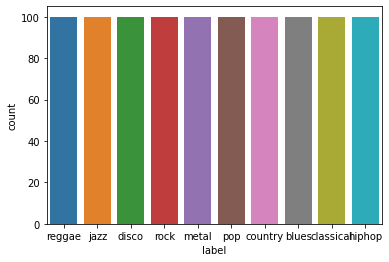

In [3]:

# null values checking
print(data.isnull().sum())
# checking data distribution is balanced or imbalanced
sns.countplot(x='label',data=data)
plt.show()

In [4]:
data

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,2644.362516,166313.529886,2539.121009,876112.502768,99.384014,31237,0.476625,0.090673,0.195715,0.010600,...,42.825832,-0.939100,66.891655,-1.083433,76.864410,-1.547620e-04,0.027665,-1.066345e-03,0.008855,reggae
1,1738.858902,58868.399307,1465.857446,143302.098295,73.828125,22129,0.254607,0.087663,0.060560,0.001276,...,160.025467,1.109709,136.810150,2.935806,95.914482,4.176099e-05,0.004387,1.114175e-04,0.000151,jazz
2,2162.799226,67058.366744,2590.650686,256436.829239,123.046875,35641,0.416228,0.080061,0.125366,0.002007,...,45.699696,-4.364861,41.651104,0.195189,45.512283,-2.375770e-03,0.005538,-1.603412e-03,0.007079,disco
3,1050.323423,62123.172997,1064.668667,161084.080653,151.999081,46847,0.268100,0.083873,0.080847,0.000992,...,45.726158,-3.496989,41.440159,-8.645326,73.411758,2.408588e-06,0.006332,4.621446e-07,0.000412,jazz
4,2273.051334,137470.780178,2259.565542,278604.938722,123.046875,38003,0.370284,0.090711,0.113059,0.003015,...,62.320354,0.965605,115.657509,2.690563,74.701248,5.716074e-06,0.004072,1.197979e-04,0.007156,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2626.625664,123350.074281,2583.568497,440427.975457,129.199219,40289,0.540868,0.069360,0.294004,0.012267,...,47.252037,-0.490775,49.166286,6.731324,53.945499,7.746730e-07,0.065104,-3.629918e-04,0.010170,disco
996,2113.399859,75862.620155,1769.392505,106243.781465,143.554688,42031,0.329923,0.094695,0.040618,0.000251,...,108.882385,-0.809871,105.402794,-0.610765,80.617722,-2.282586e-06,0.001319,-5.613606e-05,0.000176,jazz
997,2278.111986,96482.498945,2309.203496,369567.921322,117.453835,32713,0.415117,0.082711,0.206738,0.004981,...,48.148952,-6.017946,52.539734,4.418926,59.636269,-1.028984e-06,0.022264,6.476846e-04,0.011063,disco
998,1498.232422,51683.744442,1169.144817,132954.179899,95.703125,29644,0.272225,0.101324,0.069794,0.001864,...,32.563431,-1.153578,38.224953,-5.372205,69.375191,-8.195267e-04,0.004860,-1.016245e-03,0.000668,jazz


In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder ()
data['label'] =label_encoder.fit_transform (data['label'])

# data shuffling
data=data.sample(frac=1)
col=data.columns
# feature vector
x=data[col[0:len(col)-1]]
#traget
y=data['label']
print(x.head(5))
print(y.head(5))

     spectral_bandwidth_mean  spectral_bandwidth_var  spectral_centroids_mean  \
748              2908.835646           283807.724518              2949.610493   
678              2039.036516           213843.755497              1530.176679   
27               2081.878472            73530.227213              1945.533108   
56               2182.337252           106121.858556              1857.948868   
973              2180.550533            34053.001811              2503.945488   

     spectral_centroids_var       tempo  beats  chroma_stft_mean  \
748            1.365265e+06   95.703125  30823          0.474143   
678            3.758501e+05   67.999589  21316          0.327459   
27             1.475567e+05  135.999178  37637          0.395779   
56             3.799530e+05  161.499023  52262          0.389396   
973            1.628752e+05  129.199219  40067          0.436772   

     chroma_stft_var  rmse_mean  rmse_var  ...  mfcc18_mean  mfcc18_var  \
748         0.087421   0.2208

In [6]:
x.var()

spectral_bandwidth_mean    2.772001e+05
spectral_bandwidth_var     9.308074e+09
spectral_centroids_mean    5.124353e+05
spectral_centroids_var     1.606833e+11
tempo                      7.973701e+02
                               ...     
mfcc20_var                 2.053373e+03
harm_mean                  2.835795e-06
harm_var                   1.357712e-04
percp_mean                 1.170194e-06
percp_var                  4.226615e-05
Length: 62, dtype: float64

In [7]:
#checking variance among features
x.var()
# removing chroma_stft and rolloff feature as they have very low variance
data=data.drop(['harm_mean','harm_var','percp_mean','percp_var','tempo','mfcc19_mean','beats','spec_bw_var'],axis=1)
data.head(5)

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var,label
748,2908.835646,283807.724518,2949.610493,1.365265e+06,0.474143,0.087421,0.220829,0.007681,2949.610493,1.365265e+06,...,-0.692559,66.951401,3.202824,73.797539,1.044629,52.309471,84.541763,-4.720670,86.777809,7
678,2039.036516,213843.755497,1530.176679,3.758501e+05,0.327459,0.096683,0.095948,0.002373,1530.176679,3.758501e+05,...,0.927997,55.356403,-0.731125,60.314529,0.295073,48.120598,51.106190,0.531216,45.786282,0
27,2081.878472,73530.227213,1945.533108,1.475567e+05,0.395779,0.089888,0.182338,0.003967,1945.533108,1.475567e+05,...,2.995332,33.847401,-8.715193,38.756157,-0.331206,56.961727,42.306221,0.702881,55.655308,0
56,2182.337252,106121.858556,1857.948868,3.799530e+05,0.389396,0.087285,0.153514,0.002699,1857.948868,3.799530e+05,...,-0.256836,31.886759,-11.796141,45.515442,-6.499556,39.319595,48.151073,-2.736910,33.116352,9
973,2180.550533,34053.001811,2503.945488,1.628752e+05,0.436772,0.077917,0.141726,0.000619,2503.945488,1.628752e+05,...,-3.467912,50.205078,-5.226763,33.014271,-2.588546,38.181396,72.637848,-6.983890,35.916012,0


label                      1.000000
spec_bw_mean               0.388861
spectral_bandwidth_mean    0.388861
rolloff_mean               0.385465
cent_mean                  0.378669
spectral_centroids_mean    0.378669
chroma_stft_mean           0.364865
mfcc1_mean                 0.339768
spectral_centroids_var     0.317661
cent_var                   0.317661
rolloff_var                0.273672
zcr_var                    0.272311
zcr_mean                   0.268583
rmse_mean                  0.213520
spectral_bandwidth_var     0.201341
mfcc9_mean                 0.198136
mfcc7_mean                 0.182964
mfcc12_mean                0.154115
mfcc4_var                  0.143584
mfcc11_mean                0.141049
mfcc18_mean                0.119059
mfcc6_var                  0.118918
mfcc10_mean                0.115941
mfcc20_mean                0.113305
mfcc8_mean                 0.108566
rmse_var                   0.107485
mfcc14_mean                0.088641
mfcc7_var                  0

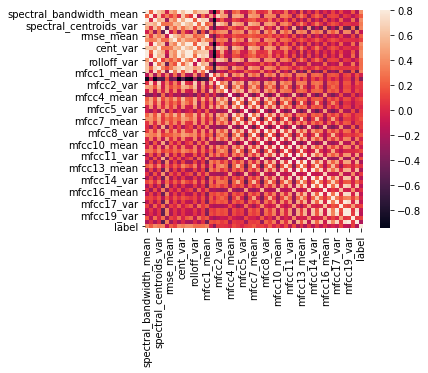

In [8]:

correlation=data.corr()
print(correlation['label'].sort_values(ascending=False),'\n')
sns.heatmap(correlation,square=True,vmax=0.8)
plt.show()

In [9]:
# https://www.overleaf.com/8296679137bhjcmqzynbgw#outlier detection
print(data.describe())
col=data.columns

min_threshold,max_threshold=data['spectral_bandwidth_var'].quantile([0.001,0.999])
data=data[(data.spectral_bandwidth_var<max_threshold) & (data.spectral_bandwidth_var>min_threshold)]
min_threshold,max_threshold=data['mfcc17_var'].quantile([0.001,0.999])
data=data[(data.mfcc17_var<max_threshold) & (data.mfcc17_var>min_threshold)]
min_threshold,max_threshold=data['mfcc18_var'].quantile([0.001,0.999])
data=data[(data.mfcc18_var<max_threshold) & (data.mfcc18_var>min_threshold)]
min_threshold,max_threshold=data['mfcc20_var'].quantile([0.001,0.999])
data=data[(data.mfcc20_var<max_threshold) & (data.mfcc20_var>min_threshold)]
min_threshold,max_threshold=data['mfcc19_var'].quantile([0.001,0.999])
data=data[(data.mfcc19_var<max_threshold) & (data.mfcc19_var>min_threshold)]
min_threshold,max_threshold=data['mfcc20_mean'].quantile([0.001,0.999])
data=data[(data.mfcc20_mean<max_threshold) & (data.mfcc20_mean>min_threshold)]


print(data.shape)
x=data[col[0:len(col)-1]]
x.head(5)
y=data['label']

       spectral_bandwidth_mean  spectral_bandwidth_var  \
count              1000.000000             1000.000000   
mean               2243.131236           137110.238662   
std                 526.497923            96478.361350   
min                 898.066208            10787.185064   
25%                1907.240605            67376.554428   
50%                2223.830270           111977.548036   
75%                2579.617072           182371.576801   
max                3509.646417           694784.811549   

       spectral_centroids_mean  spectral_centroids_var  chroma_stft_mean  \
count              1000.000000            1.000000e+03       1000.000000   
mean               2202.657734            4.698121e+05          0.379505   
std                 715.845883            4.008532e+05          0.081810   
min                 570.040355            7.911251e+03          0.168366   
25%                1627.697311            1.843505e+05          0.320984   
50%                22

In [10]:
col=data.columns
x=data[col[0:len(col)-1]]
x.head(5)

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,cent_mean,cent_var,...,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_var,mfcc20_mean,mfcc20_var
748,2908.835646,283807.724518,2949.610493,1.365265e+06,0.474143,0.087421,0.220829,0.007681,2949.610493,1.365265e+06,...,57.304157,-0.692559,66.951401,3.202824,73.797539,1.044629,52.309471,84.541763,-4.720670,86.777809
678,2039.036516,213843.755497,1530.176679,3.758501e+05,0.327459,0.096683,0.095948,0.002373,1530.176679,3.758501e+05,...,52.422142,0.927997,55.356403,-0.731125,60.314529,0.295073,48.120598,51.106190,0.531216,45.786282
27,2081.878472,73530.227213,1945.533108,1.475567e+05,0.395779,0.089888,0.182338,0.003967,1945.533108,1.475567e+05,...,46.737709,2.995332,33.847401,-8.715193,38.756157,-0.331206,56.961727,42.306221,0.702881,55.655308
56,2182.337252,106121.858556,1857.948868,3.799530e+05,0.389396,0.087285,0.153514,0.002699,1857.948868,3.799530e+05,...,45.485703,-0.256836,31.886759,-11.796141,45.515442,-6.499556,39.319595,48.151073,-2.736910,33.116352
973,2180.550533,34053.001811,2503.945488,1.628752e+05,0.436772,0.077917,0.141726,0.000619,2503.945488,1.628752e+05,...,71.991043,-3.467912,50.205078,-5.226763,33.014271,-2.588546,38.181396,72.637848,-6.983890,35.916012


In [11]:

#normalising the feature vectors

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(np_scaled, columns = x.columns)

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from  sklearn.model_selection import cross_val_score


# ANN

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing

In [14]:
# import pandas as pd
# import seaborn as sns
# data=pd.read_csv('df.csv',index_col=0)
# data

In [15]:
data.shape

(988, 55)

In [16]:
encoder=preprocessing.LabelEncoder()
genre_list=data.iloc[:,-1]
y=encoder.fit_transform(genre_list)
# data=data.drop(['label'],axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(np.array(data.iloc[:,:-1],dtype=float))
print(X.shape)


(988, 54)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=256,verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)

In [122]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.77%


In [25]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[3,4,5,6,7],'weights': ["uniform","distance"],
                     'algorithm' : ["auto", "ball_tree", "kd_tree", "brute"],'p':[1,2],'leaf_size':[25,30,35,40]}
                   ]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [26]:
dfknn = pd.DataFrame(clf.cv_results_)
dfknn.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
229,0.001643,0.000050,0.013241,0.000129,kd_tree,40,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...",0.681818,0.702020,0.702020,0.634518,0.685279,0.681131,0.024752,1
89,0.001725,0.000101,0.010641,0.000130,ball_tree,25,5,1,distance,"{'algorithm': 'ball_tree', 'leaf_size': 25, 'n...",0.681818,0.702020,0.702020,0.634518,0.685279,0.681131,0.024752,1
209,0.001636,0.000035,0.013176,0.000198,kd_tree,35,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 35, 'n_n...",0.681818,0.702020,0.702020,0.634518,0.685279,0.681131,0.024752,1
109,0.001640,0.000020,0.010556,0.000181,ball_tree,30,5,1,distance,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.681818,0.702020,0.702020,0.634518,0.685279,0.681131,0.024752,1
69,0.000827,0.000204,0.010854,0.000843,auto,40,5,1,distance,"{'algorithm': 'auto', 'leaf_size': 40, 'n_neig...",0.681818,0.702020,0.702020,0.634518,0.685279,0.681131,0.024752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.001663,0.000047,0.019162,0.000127,kd_tree,25,4,2,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 25, 'n_n...",0.661616,0.661616,0.681818,0.614213,0.644670,0.652787,0.022594,305
206,0.001670,0.000048,0.019188,0.000208,kd_tree,35,4,2,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 35, 'n_n...",0.661616,0.661616,0.681818,0.614213,0.644670,0.652787,0.022594,305
106,0.001727,0.000040,0.015958,0.000236,ball_tree,30,4,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 30, 'n...",0.661616,0.661616,0.681818,0.614213,0.644670,0.652787,0.022594,305
146,0.001695,0.000106,0.017980,0.002363,ball_tree,40,4,2,uniform,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n...",0.661616,0.661616,0.681818,0.614213,0.644670,0.652787,0.022594,305


In [27]:
knn = KNeighborsClassifier( algorithm='auto', n_neighbors= 5, p= 1, weights= 'distance',leaf_size=25)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

occuracies=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=cv)
print(occuracies.mean())
print(occuracies.std())
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print('Accuracy', 'kNN', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.679746835443038
0.0630501742046191
Accuracy kNN : 0.67677 



In [28]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'shrinking':[True,False],'decision_function_shape': ["ovr","ovo"],
                     'C': [1,10,20,30],'kernel':['linear']}
                   ]

clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)

""""
clf = GridSearchCV(model.SVC(gamma='auto'), {
    'C': [1,10,20,30],
    'shrinking': [True,False],
    'decision_function_shape': ["ovr","ovo"]   
    
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
"""

Best parameters set found on development set:

{'C': 1, 'decision_function_shape': 'ovr', 'kernel': 'linear', 'shrinking': True}


'"\nclf = GridSearchCV(model.SVC(gamma=\'auto\'), {\n    \'C\': [1,10,20,30],\n    \'shrinking\': [True,False],\n    \'decision_function_shape\': ["ovr","ovo"]   \n    \n}, cv=5, return_train_score=False)\nclf.fit(X, y)\nclf.cv_results_\n'

In [29]:
dfsv = pd.DataFrame(clf.cv_results_)
dfsv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048796,0.006400,0.007921,0.002774,1,ovr,linear,True,"{'C': 1, 'decision_function_shape': 'ovr', 'ke...",0.611111,0.717172,0.717172,0.680203,0.720812,0.689294,0.041816,1
1,0.052099,0.002488,0.005648,0.000275,1,ovr,linear,False,"{'C': 1, 'decision_function_shape': 'ovr', 'ke...",0.611111,0.717172,0.717172,0.680203,0.720812,0.689294,0.041816,1
2,0.044720,0.002510,0.006656,0.001166,1,ovo,linear,True,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.611111,0.717172,0.717172,0.680203,0.720812,0.689294,0.041816,1
3,0.057924,0.008961,0.006112,0.000581,1,ovo,linear,False,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.611111,0.717172,0.717172,0.680203,0.720812,0.689294,0.041816,1
4,0.075739,0.011785,0.005833,0.000765,10,ovr,linear,True,"{'C': 10, 'decision_function_shape': 'ovr', 'k...",0.595960,0.717172,0.691919,0.644670,0.685279,0.667000,0.042468,9
5,0.101420,0.014798,0.005449,0.000165,10,ovr,linear,False,"{'C': 10, 'decision_function_shape': 'ovr', 'k...",0.595960,0.717172,0.691919,0.644670,0.685279,0.667000,0.042468,9
6,0.075808,0.012083,0.005443,0.000138,10,ovo,linear,True,"{'C': 10, 'decision_function_shape': 'ovo', 'k...",0.595960,0.717172,0.691919,0.644670,0.685279,0.667000,0.042468,9
7,0.101782,0.014742,0.005471,0.000152,10,ovo,linear,False,"{'C': 10, 'decision_function_shape': 'ovo', 'k...",0.595960,0.717172,0.691919,0.644670,0.685279,0.667000,0.042468,9
8,0.109661,0.016720,0.005775,0.000448,20,ovr,linear,True,"{'C': 20, 'decision_function_shape': 'ovr', 'k...",0.590909,0.722222,0.686869,0.659898,0.680203,0.668020,0.043482,7
9,0.134935,0.018822,0.005390,0.000151,20,ovr,linear,False,"{'C': 20, 'decision_function_shape': 'ovr', 'k...",0.590909,0.722222,0.691919,0.659898,0.680203,0.669030,0.043965,5


In [30]:
svm = SVC(C= 10, decision_function_shape= "ovr", kernel= 'linear', shrinking= True)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)

print(occuracies.mean(), occuracies.std())

svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print('Accuracy', 'svm', ':', round(accuracy_score(y_test, preds), 5), '\n')

0.6531645569620252 0.06384567196414424
Accuracy svm : 0.64141 



In [ ]:

from sklearn.neural_network import MLPClassifier
tuned_parameters = [{'hidden_layer_sizes':[(50,75,50), (50,100,50), (100,50)],'activation':["identity", "logistic", "tanh", "relu"], 'solver': ["lbfgs", "sgd", "adam"],
                     'learning_rate' : ["constant", "invscaling", "adaptive"],'alpha': [0.0001, 0.05],'solver': ['sgd', 'adam'],'max_iter':[200,300,400]}
                   ]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X, y)


print("Best parameters set found on development set:\n")
print(clf.best_params_)


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
dfnn = pd.DataFrame(clf.cv_results_)
dfnn.sort_values(by=['rank_test_score'])

In [ ]:

nn = MLPClassifier(activation= 'tanh','alpha'= 0.0001, hidden_layer_sizes= (100, 50) 'learning_rate'= adaptive, 'solver': 'adam'})

occuracies=cross_val_score(estimator=nn,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
nn.fit(X_train,y_train)
preds = nn.predict(X_test)
print('Accuracy', 'Neural network', ':', round(accuracy_score(y_test, preds), 5), '\n')
    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
dtree_model.fit(X_train, y_train)
preds = dtree_model.predict(X_test)
print('Accuracy', 'Descision tree', ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X1, y1 = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
clf.fit(X_train,y_train)

preds = clf.predict(X_test)
print('Accuracy', 'Ada Boost:', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
from sklearn.svm import SVC
svm = SVC(decision_function_shape="ovr",kernel="linear")
occuracies=cross_val_score(estimator=svm,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
svm.fit(X_train,y_train)
preds = svm.predict(X_test)
print('Accuracy', 'svm', ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
occuracies=cross_val_score(estimator=nb,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print('Accuracy', 'Naive bayes', ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
LDA.fit(X_train, y_train)
preds = LDA.predict(X_test)
print('Accuracy', 'LDA', ':', round(accuracy_score(y_test, preds), 5), '\n')


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA=QuadraticDiscriminantAnalysis()
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
QDA.fit(X_train, y_train)
preds = QDA.predict(X_test)
print('Accuracy', 'QDA', ':', round(accuracy_score(y_test, preds), 5), '\n')



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X1, y1 = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,random_state=0, shuffle=False)
randomforest = RandomForestClassifier(max_depth=2, random_state=0)
occuracies=cross_val_score(estimator=LDA,X=X_train,y=y_train,cv=cv)
print(occuracies.mean(), occuracies.std())
randomforest.fit(X, y)
preds = randomforest.predict(X_test)
print('Accuracy', 'Random Forest', ':', round(accuracy_score(y_test, preds), 5), '\n')


In [78]:
data = pd.read_csv(f'df.csv')#made

In [79]:
data.columns

Index(['Unnamed: 0', 'spectral_bandwidth_mean', 'spectral_bandwidth_var',
       'spectral_centroids_mean', 'spectral_centroids_var', 'tempo', 'beats',
       'chroma_stft_mean', 'chroma_stft_var', 'rmse_mean', 'rmse_var',
       'cent_mean', 'cent_var', 'spec_bw_mean', 'spec_bw_var', 'rolloff_mean',
       'rolloff_var', 'zcr_mean', 'zcr_var', 'mfcc1_mean', 'mfcc1_var',
       'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean',
       'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var',
       'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean',
       'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var',
       'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean',
       'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean',
       'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'harm_mean', 'harm_var',
       'pe

In [80]:
data

,Unnamed: 0,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,0,2644.362516,166313.529886,2539.121009,876112.502768,99.384014,31237,0.476625,0.090673,0.195715,...,42.825832,-0.939100,66.891655,-1.083433,76.864410,-1.547620e-04,0.027665,-1.066345e-03,0.008855,reggae
1,1,1738.858902,58868.399307,1465.857446,143302.098295,73.828125,22129,0.254607,0.087663,0.060560,...,160.025467,1.109709,136.810150,2.935806,95.914482,4.176099e-05,0.004387,1.114175e-04,0.000151,jazz
2,2,2162.799226,67058.366744,2590.650686,256436.829239,123.046875,35641,0.416228,0.080061,0.125366,...,45.699696,-4.364861,41.651104,0.195189,45.512283,-2.375770e-03,0.005538,-1.603412e-03,0.007079,disco
3,3,1050.323423,62123.172997,1064.668667,161084.080653,151.999081,46847,0.268100,0.083873,0.080847,...,45.726158,-3.496989,41.440159,-8.645326,73.411758,2.408588e-06,0.006332,4.621446e-07,0.000412,jazz
4,4,2273.051334,137470.780178,2259.565542,278604.938722,123.046875,38003,0.370284,0.090711,0.113059,...,62.320354,0.965605,115.657509,2.690563,74.701248,5.716074e-06,0.004072,1.197979e-04,0.007156,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2626.625664,123350.074281,2583.568497,440427.975457,129.199219,40289,0.540868,0.069360,0.294004,...,47.252037,-0.490775,49.166286,6.731324,53.945499,7.746730e-07,0.065104,-3.629918e-04,0.010170,disco
996,996,2113.399859,75862.620155,1769.392505,106243.781465,143.554688,42031,0.329923,0.094695,0.040618,...,108.882385,-0.809871,105.402794,-0.610765,80.617722,-2.282586e-06,0.001319,-5.613606e-05,0.000176,jazz
997,997,2278.111986,96482.498945,2309.203496,369567.921322,117.453835,32713,0.415117,0.082711,0.206738,...,48.148952,-6.017946,52.539734,4.418926,59.636269,-1.028984e-06,0.022264,6.476846e-04,0.011063,disco
998,998,1498.232422,51683.744442,1169.144817,132954.179899,95.703125,29644,0.272225,0.101324,0.069794,...,32.563431,-1.153578,38.224953,-5.372205,69.375191,-8.195267e-04,0.004860,-1.016245e-03,0.000668,jazz


In [81]:
data=data.sort_values('label')

# Main

In [134]:
data = pd.read_csv(f'df.csv')
# data=data.sort_values('label')
data = data.iloc[0:, 1:]
# data.drop(['beats','cent_mean','cent_var','spec_bw_var','spec_bw_mean'], inplace=True, axis=1)
data.head()

,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_centroids_mean,spectral_centroids_var,tempo,beats,chroma_stft_mean,chroma_stft_var,rmse_mean,rmse_var,...,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,harm_mean,harm_var,percp_mean,percp_var,label
0,2644.362516,166313.529886,2539.121009,876112.502768,99.384014,31237,0.476625,0.090673,0.195715,0.010600,...,42.825832,-0.939100,66.891655,-1.083433,76.864410,-0.000155,0.027665,-1.066345e-03,0.008855,reggae
1,1738.858902,58868.399307,1465.857446,143302.098295,73.828125,22129,0.254607,0.087663,0.060560,0.001276,...,160.025467,1.109709,136.810150,2.935806,95.914482,0.000042,0.004387,1.114175e-04,0.000151,jazz
2,2162.799226,67058.366744,2590.650686,256436.829239,123.046875,35641,0.416228,0.080061,0.125366,0.002007,...,45.699696,-4.364861,41.651104,0.195189,45.512283,-0.002376,0.005538,-1.603412e-03,0.007079,disco
3,1050.323423,62123.172997,1064.668667,161084.080653,151.999081,46847,0.268100,0.083873,0.080847,0.000992,...,45.726158,-3.496989,41.440159,-8.645326,73.411758,0.000002,0.006332,4.621446e-07,0.000412,jazz
4,2273.051334,137470.780178,2259.565542,278604.938722,123.046875,38003,0.370284,0.090711,0.113059,0.003015,...,62.320354,0.965605,115.657509,2.690563,74.701248,0.000006,0.004072,1.197979e-04,0.007156,disco


In [135]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    # Confusion Matrix
#     confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
#     plt.figure(figsize = (16, 9))
#     sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
#                 xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
#                yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
#     plt.savefig("conf matrix")
#     plt.show()
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:

# KNN
knn = KNeighborsClassifier(n_neighbors=10)
model_assess(knn, "KNN")


# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")


# Neural Nets
nn = MLPClassifier(random_state=1, max_iter=2000)
model_assess(nn, "Neural Nets")

# Extra

In [115]:
def norm_df(X,label):
    X = X.loc[:, X.columns != 'label']
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(X)
    X = pd.DataFrame(np_scaled, columns = cols)
    X['label']=label
    return X

In [116]:
rock_df=norm_df(data[data['label'] == 'rock'],'rock')
classical_df=norm_df(data[data['label'] == 'classical'],'classical')
metal_df=norm_df(data[data['label'] == 'metal'],'metal')
disco_df=norm_df(data[data['label'] == 'disco'],'disco')
blues_df=norm_df(data[data['label'] == 'blues'],'blues')
reggae_df=norm_df(data[data['label'] == 'reggae'],'reggae')
country_df=norm_df(data[data['label'] == 'country'],'country')
hiphop_df=norm_df(data[data['label'] == 'hiphop'],'hiphop')
jazz_df=norm_df(data[data['label'] == 'jazz'],'jazz')
pop_df=norm_df(data[data['label'] == 'pop'],'pop')
classical_df=classical_df.append(metal_df, ignore_index=True)
classical_df=classical_df.append(rock_df, ignore_index=True)
classical_df=classical_df.append(disco_df, ignore_index=True)
classical_df=classical_df.append(blues_df, ignore_index=True)
classical_df=classical_df.append(reggae_df, ignore_index=True)
classical_df=classical_df.append(country_df, ignore_index=True)
classical_df=classical_df.append(hiphop_df, ignore_index=True)
classical_df=classical_df.append(jazz_df, ignore_index=True)
classical_df=classical_df.append(pop_df, ignore_index=True)
data=classical_df